In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

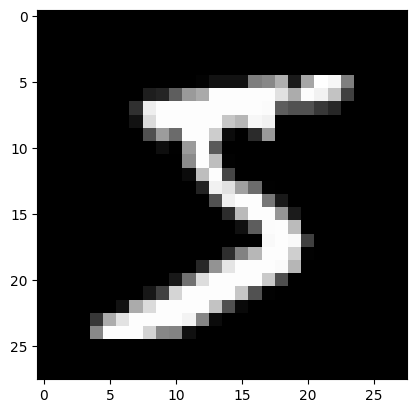

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

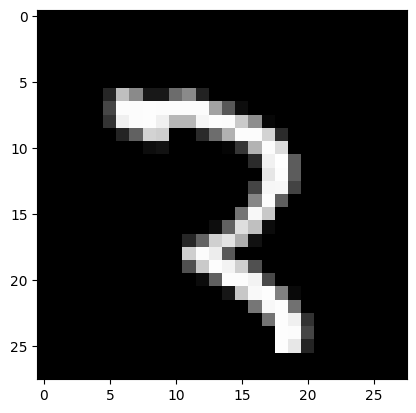

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [26]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 68s 71ms/step - loss: 0.1883 - accuracy: 0.9450 - val_loss: 0.0648 - val_accuracy: 0.9791
Epoch 2/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0592 - accuracy: 0.9822 - val_loss: 0.0540 - val_accuracy: 0.9818
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0431 - val_accuracy: 0.9866
Epoch 4/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 5/5
938/938 [==============================] - 63s 68ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0381 - val_accuracy: 0.9887


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.188297,0.944983,0.064806,0.9791
1,0.059245,0.982150,0.053969,0.9818
2,0.040372,0.987250,0.043087,0.9866
3,0.030056,0.990317,0.036708,0.9879
4,0.024317,0.992167,0.038102,0.9887


Priyanka-212222230113


<Axes: >

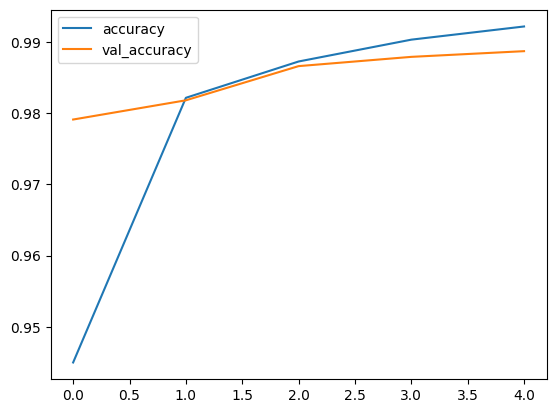

In [30]:
print("Priyanka-212222230113")
metrics[['accuracy','val_accuracy']].plot()

Priyanka-212222230113


<Axes: >

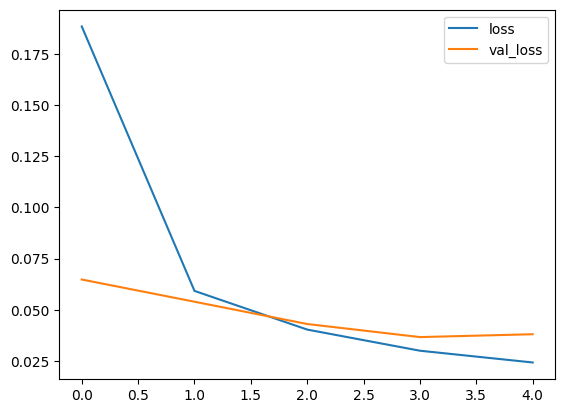

In [31]:
print("Priyanka-212222230113")
metrics[['loss','val_loss']].plot()

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 4s 12ms/step


In [33]:
print("Priyanka-212222230113")
print(confusion_matrix(y_test,x_test_predictions))

Priyanka-212222230113
[[ 976    1    0    0    1    0    1    1    0    0]
 [   0 1133    0    0    1    0    0    1    0    0]
 [   0    1 1021    0    1    0    0    6    3    0]
 [   0    0    0 1003    0    2    0    3    2    0]
 [   1    0    0    0  979    0    0    0    0    2]
 [   1    0    0    5    0  884    2    0    0    0]
 [   4    3    0    0    5    4  941    0    1    0]
 [   0    1    4    0    0    1    0 1021    1    0]
 [   3    1    1    0    4    1    0    2  960    2]
 [   3    1    0    2   17    8    0    7    2  969]]


In [34]:
print("Priyanka-212222230113")
print(classification_report(y_test,x_test_predictions))

Priyanka-212222230113
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
# Prediction for a single input
img = image.load_img('imagefive.jpg')

In [36]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [37]:
img = image.load_img('imagefive.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [38]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [39]:
print(x_single_prediction)

[5]


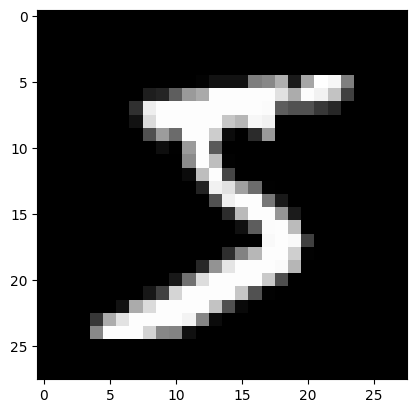

In [40]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [41]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 25ms/step


In [43]:
print("Priyanka-212222230113")
print(x_single_prediction)

Priyanka-212222230113
[5]
